[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


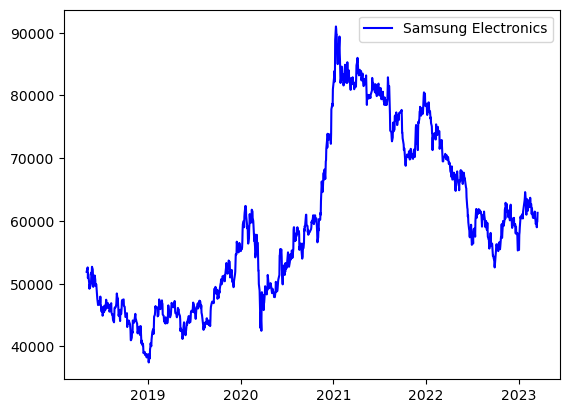

In [13]:
from pandas_datareader import data as pdr ## 파이썬증권데이터분석 #3.4.1
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')   ## 삼성전자
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')       ## 마이크로소프트


import matplotlib.pyplot as plt

plt. plot (sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.legend(loc='best')                        ## 범례 위치를 고정이아닌, 그래프 형태에 따라 최적인 곳에 배치
plt.show()

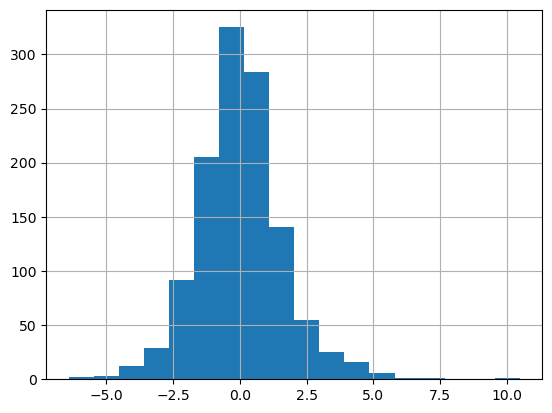

In [12]:
import matplotlib.pyplot as plt   ## 파이썬증권데이터분석 #3.4.2

sec_dpc=(sec['Close']/sec['Close'].shift(1)-1)*100   #daily percent change
sec_dpc.iloc[0]=0   ## 데이터전처리

plt.hist(sec_dpc, bins=18)
plt.grid(True)
#plt.legend(loc='best')                        ## 범례 위치를 고정이아닌, 그래프 형태에 따라 최적인 곳에 배치
plt.show()